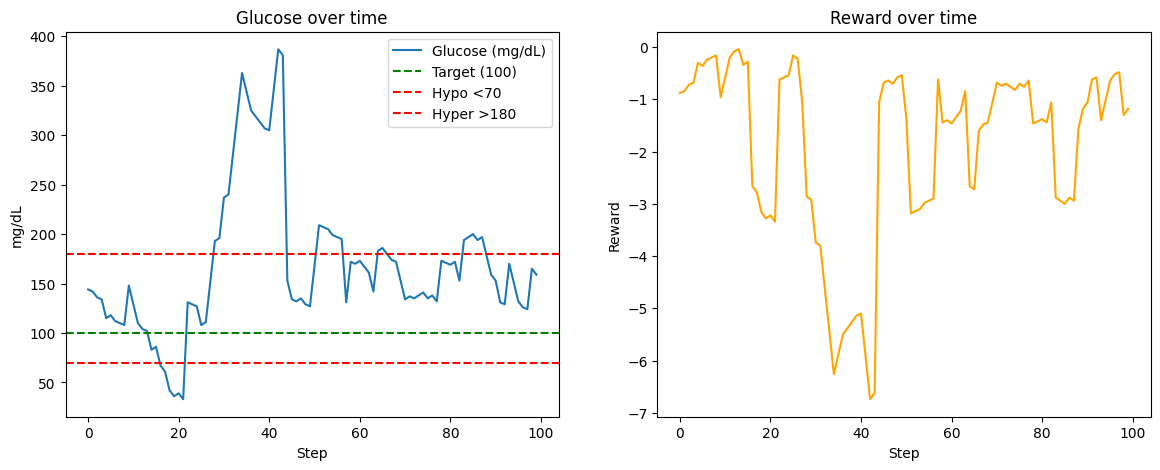

Actions taken: [array(2), array(1), array(2), array(1), array(4), array(0), array(2), array(1), array(1), array(1), array(4), array(4), array(2), array(1), array(4), array(0), array(4), array(2), array(4), array(2)] ...


In [5]:
# --- Imports ---
%matplotlib inline
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from src.envs.diabetes_env import DiabetesEnv

# --- Load environment and trained model ---
env = DiabetesEnv()
model = PPO("MlpPolicy", env, verbose=0)  # or load a saved model later

# --- Run a test episode ---
obs, _ = env.reset()
glucose_history = []
reward_history = []
actions = []

for step in range(100):  # simulate 100 steps
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    glucose = obs[0]  # first element of state = glucose
    glucose_history.append(glucose)
    reward_history.append(reward)
    actions.append(action)

    if terminated or truncated:
        obs, _ = env.reset()

# --- Plot results ---
plt.figure(figsize=(14,5))

# Glucose trajectory
plt.subplot(1,2,1)
plt.plot(glucose_history, label="Glucose (mg/dL)")
plt.axhline(100, color="g", linestyle="--", label="Target (100)")
plt.axhline(70, color="r", linestyle="--", label="Hypo <70")
plt.axhline(180, color="r", linestyle="--", label="Hyper >180")
plt.xlabel("Step")
plt.ylabel("mg/dL")
plt.title("Glucose over time")
plt.legend()

# Reward trajectory
plt.subplot(1,2,2)
plt.plot(reward_history, color="orange")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Reward over time")

plt.show()

# Optional: print actions for inspection
print("Actions taken:", actions[:20], "...")
